<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



### Integrantes

* Carignano, Hugo
* Díaz, Federico
* Villafañe, Roxana. 



## **Consignas para la materia  Introducción al Aprendizaje Automático**

### 1 General 
*FECHA LíMITE DE ENTREGA: 15/08*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia " Introducción al Aprendisaje Automático". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendizaje Automático

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

##### Preparando el dataSet:

Teniendo en cuenta los resultados de las entregas anteriores en cuanto al desbalance del dataSet o al posible sesgo, proponer una nueva separación (80/20) entre train test del dataset original .

  1- Recordar que en nuestro caso podemos realizar clasificación binaria (ccb y csb) . Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

 
  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir como mucho las 5 mas representativas para:

## Regresión:

 * Hacer una gráfica que muestre su relación con la variable objetivo.
 * Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado.
 * Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. 
 * Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.  
    
 * Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones. 
    
 * Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste.
 * Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.
 
###### Posibles variables objetivos:
 * Las variables con los canales de los colores
 * Los tamaños de los objetos


  ## Clasificación:
   Seleccionar de a pares de características en el conjunto Train para clasificación binaria: csb -ccb.   
   Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco implementar los algoritmos de (del paquete sklearn):
   * Perceptrón, 
   * SGD 
   * Árboles de Decisión 

   Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros. Realizar las gráficas correspondientes de ROC, PR y las de froteras de desición. 
   
   * ¿Puedo determinar el video que originó la imagen? Aplicar clasificación multiclase. 
   * Realizar una represtanción matricial con los resultados: Matriz de confusión.
    
   



Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [2]:
#instalamos paquete para balancear las clases
!pip install -U imbalanced-learn

     |████████████████████████████████| 206 kB 2.8 MB/s 
     |████████████████████████████████| 22.3 MB 69.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


Agregue unas lineas para bajar copiar el dataSet desde el repo directamente: 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/Mentoría-imágenes/dataset/')
!ls

all-frames_test				       Video3-frames_test.csv
all-frames_train			       Video3-frames_train.csv
crop					       Video4-frames_test.csv
dataSet_test_crop_features_labels.csv	       Video4-frames_train.csv
dataSet_train_crop_features_labels.csv	       Video5-frames_test.csv
dataSet_train_crop_features_labels_wError.csv  Video5-frames_train.csv
DEUBa_dataset.ipynb			       Video6-frames_test.csv
Video10-frames_test.csv			       Video6-frames_train.csv
Video10-frames_train.csv		       Video7-frames_test.csv
Video11-frames_test.csv			       Video7-frames_train.csv
Video11-frames_train.csv		       Video8-frames_test.csv
Video1-frames_test.csv			       Video8-frames_train.csv
Video1-frames_train.csv			       Video9-frames_test.csv
Video2-frames_test.csv			       Video9-frames_train.csv
Video2-frames_train.csv


### Importamos librerias

In [5]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import numpy as np

import matplotlib.pyplot as plt
from os import path
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree, export_text


In [6]:
import sys
sys.path.append('/content/drive/My Drive/Mentoría-imágenes')


In [7]:
#import el script que tiene el codigo para el decision boundary
import utils

#### Ingreso de datos

In [8]:
#ingresamos los datasets completos
train = pd.read_csv('dataSet_train_crop_features_labels.csv', index_col=0, low_memory=False) 
test = pd.read_csv('dataSet_test_crop_features_labels.csv', index_col=0, low_memory=False)

train y test son los datos originales

In [9]:
train.head() #vemos el encabezado del dataset

filename  width  ...      2046      2047
0  Video1-frame-000001_single_box_0.jpg    640  ...  0.574400  0.002943
1  Video1-frame-000002_single_box_0.jpg    640  ...  0.584723  0.016324
2  Video1-frame-000003_single_box_0.jpg    640  ...  0.363607  0.022648
3  Video1-frame-000005_single_box_0.jpg    640  ...  0.441648  0.007727
4  Video1-frame-000006_single_box_0.jpg    640  ...  0.450313  0.105094

[5 rows x 2063 columns]

In [10]:
test.head() #vemos el encabezado

filename  width  ...      2046      2047
0  Video1-frame-000004_single_box_0.jpg    640  ...  0.499648  0.015035
1  Video1-frame-000021_single_box_0.jpg    640  ...  0.372580  0.057565
2  Video1-frame-000039_single_box_0.jpg    640  ...  0.631417  0.047634
3  Video1-frame-000040_single_box_0.jpg    640  ...  0.583134  0.020465
4  Video1-frame-000049_single_box_0.jpg    640  ...  0.616542  0.032798

[5 rows x 2063 columns]

Fuente:
https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

In [11]:
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
 
from collections import Counter

Vamos a tomar como variable Y, el canal R de los tres canales RGB.

In [12]:
X_train = train._get_numeric_data()
X_train.head()


width  height  xmin  xmax  ...      2044      2045      2046      2047
0    640     360   304   359  ...  0.003393  0.009189  0.574400  0.002943
1    640     360   300   363  ...  0.119403  0.024265  0.584723  0.016324
2    640     360   301   368  ...  0.130680  0.034125  0.363607  0.022648
3    640     360   304   364  ...  0.015458  0.001125  0.441648  0.007727
4    640     360   300   366  ...  0.042033  0.015454  0.450313  0.105094

[5 rows x 2059 columns]

In [13]:
y_train = train['ch_R']
X_train = train.drop('ch_R', axis=1)

Desbalanceo de los datos - para consultar

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
[texto del vínculo](https://)

### Clasificación

En esta etapa vamos a realizar clasificaciones teniendo como variables las variables numéricas y como target la variable correspondiente a las clases "con" y "sin" barbijo. 

In [14]:
X_train = train._get_numeric_data()
X_train.head()

width  height  xmin  xmax  ...      2044      2045      2046      2047
0    640     360   304   359  ...  0.003393  0.009189  0.574400  0.002943
1    640     360   300   363  ...  0.119403  0.024265  0.584723  0.016324
2    640     360   301   368  ...  0.130680  0.034125  0.363607  0.022648
3    640     360   304   364  ...  0.015458  0.001125  0.441648  0.007727
4    640     360   300   366  ...  0.042033  0.015454  0.450313  0.105094

[5 rows x 2059 columns]

In [114]:
y_train = train['clase']

In [16]:
X_test = test._get_numeric_data()
y_test = test['clase']

In [115]:
y_test = test['clase']


### Vamos a aplicar una estrategia de undersampling

Undersampling basado en vecinos





* NearMiss se refiere a una colección de metodos de undersampling que seleccionan ejemplos basados en la distancia a la clase mayoritaria. El enfoque fue propuesto por Jianping Zhang and Inderjeet Mani en el 2003 en el paper KNN Approach to Unbalanced Data Distributions: A Case Study Involving Information Extraction. 

* Hay 3 versiones de esta técnica, llamadas NearMiss-1, NearMiss-2, NearMiss-3. NearMiss-1 selecciona ejemplos de la clase mayoritaria que tienen la distancia promedio menor a los 3 ejemplos mas cercanos a la clase minoritaria. 
NearMiss-2 selecciona ejemplos de la clase mayoritaria que tienen distancia promedio a los 3 ejemplos mas lejanos de la clase minoritaria. 
NearMiss-3 implica seleccionar un dado número de ejemplos de la clase mayoritaria para cada ejemplo en la clase minoritaria que son los más cercanos. Aquí, se utiliza la distancia en un espacio de caracteristicas (feature space) usando distancia Euclidea o similar. 

Fuente: Imbalanced Classification with Python 


Mas información de la documentación del paquete con la función: 
https://imbalanced-learn.org/dev/auto_examples/under-sampling/plot_illustration_nearmiss.html#sphx-glr-auto-examples-under-sampling-plot-illustration-nearmiss-py 

 <img src="https://imbalanced-learn.org/dev/_images/sphx_glr_plot_illustration_nearmiss_001.png" width="500" height="500"> 


In [23]:
nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  



In [24]:
nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm1.fit_resample(X_train, y_train)
X_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled = pd.DataFrame(y_resampled, columns=['clase'])

Veamos la dimensión luego del resampling

In [25]:
X_resampled.shape, y_resampled.shape

((972, 2059), (972, 1))

Veamos cuantas filas por clase tenemos:

In [26]:
y_resampled.value_counts() #tenemos la misma cantidad, con y sin barbijo despues del resampling

clase
csb      486
ccb      486
dtype: int64

Como podemos ver, tenemos las dos clases en estudio (con y sin barbijo) en igual número, por ende, están balanceadas. Con la misma cantidad de cada clase, podemos proceder a realizar la clasificación. 

In [27]:
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_resampled)))

Distribution before resampling Counter({'ccb': 1427, 'csb': 486})
Distribution after resampling Counter({'clase': 1})


Como podemos ver, tenemos el mismo número de muestras para ambas clases. 

In [28]:
#vamos a hacer el resampleo para el TEST dataset
X_resampled_test, y_resampled_test = nm1.fit_resample(X_test, y_test)
print ("Distribution before resampling {}".format(Counter(y_test)))
print ("Distribution after resampling {}".format(Counter(y_resampled_test)))

Distribution before resampling Counter({'ccb': 382, 'csb': 113})
Distribution after resampling Counter({'ccb': 113, 'csb': 113})


### Instancia 1

Vamos a entrenar el modelo con un subset de variables que **no incluyen las variables de la ResNet10.**

In [29]:
X_resampled_train = X_resampled.copy()
X_resampled_train

width  height  xmin  xmax  ...      2044      2045      2046      2047
0      400     224   351   386  ...  0.325722  0.256101  0.986947  0.195837
1      400     224   351   385  ...  0.318935  0.199575  0.770055  0.101509
2      640     360   203   252  ...  0.452438  0.005306  0.194883  0.323390
3      400     224   349   384  ...  0.158693  0.149666  0.528732  0.089840
4      400     224   349   380  ...  0.073962  0.182467  0.635909  0.054692
..     ...     ...   ...   ...  ...       ...       ...       ...       ...
967   1280     720   309   437  ...  0.046336  0.033333  0.354984  0.002071
968   1280     720   303   422  ...  0.074975  0.033770  0.263609  0.000561
969   1280     720   269   402  ...  0.000000  0.043840  0.275879  0.000913
970   1280     720   280   394  ...  0.001913  0.012070  0.292791  0.000000
971   1280     720   289   417  ...  0.110406  0.034726  0.283089  0.002760

[972 rows x 2059 columns]

In [33]:
train.head()

filename  width  ...      2046      2047
0  Video1-frame-000001_single_box_0.jpg    640  ...  0.574400  0.002943
1  Video1-frame-000002_single_box_0.jpg    640  ...  0.584723  0.016324
2  Video1-frame-000003_single_box_0.jpg    640  ...  0.363607  0.022648
3  Video1-frame-000005_single_box_0.jpg    640  ...  0.441648  0.007727
4  Video1-frame-000006_single_box_0.jpg    640  ...  0.450313  0.105094

[5 rows x 2063 columns]

In [34]:
y_resampled_train = y_resampled.copy()

In [35]:
#vamos a elegir las variables numericas del dataset
X_resampled_train_1 = X_resampled_train.iloc[:,1:11]
X_resampled_train_1

height  xmin  xmax  ymin  ...  bb_height        ch_R        ch_G        ch_B
0       224   351   386    31  ...         38  106.664665  101.290977   98.077446
1       224   351   385    31  ...         38  105.969040  101.053406   99.143959
2       360   203   252    76  ...         52   90.761383   74.148743   71.496864
3       224   349   384    34  ...         35  100.561630   96.773064   94.906120
4       224   349   380    37  ...         33  103.706741  101.823067  100.944283
..      ...   ...   ...   ...  ...        ...         ...         ...         ...
967     720   309   437   201  ...        143  168.217163  130.305344  118.392044
968     720   303   422   222  ...        132  171.753311  131.269104  118.932266
969     720   269   402   210  ...        139  158.418518  122.634399  112.442856
970     720   280   394   222  ...        139  168.762146  129.650757  117.267128
971     720   289   417   215  ...        135  163.307983  127.401100  115.677834

[972 rows x 10 columns]

In [37]:
y_resampled_train.shape

(972, 1)

In [38]:
X_resampled_test_1 = X_resampled_test.iloc[:,1:11]
X_resampled_test_1.shape

(226, 10)

### Clasificador: SGDClassifier()

En esta primera instancia vamos a utilizar SGDClassifier con los hiperparámetros por defecto que ofrece el modelo de scikit learn. 
Mediante SGDClassifier se agrupan algoritmos de clasificación lineales. Más información en:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

#### Sin tuneo de hiperparametros

In [40]:
clf = SGDClassifier(random_state= 100) #solo se dejo la semilla aleatoria para asegurarnos reproducibilidad
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled_train_1)
X_test = scaler.transform(X_resampled_test_1)
clf.fit(X_train, y_resampled_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(random_state=100)

En esta primera instancia vamos a ver el resultado para los datos de training. Si bien este no es el valor final, nos da idea de cuan bien está fiteando la función. El objetivo siempre será disminuir el error  de clasificación en el TESTING dataset. También observamos el reporte de las métricas como F1 score, Recall y precision. También se detalla la matriz de confusión.  

Resultados para conjunto de train 

              precision    recall  f1-score   support

         ccb       0.81      0.89      0.85       486
         csb       0.87      0.79      0.83       486

    accuracy                           0.84       972
   macro avg       0.84      0.84      0.84       972
weighted avg       0.84      0.84      0.84       972



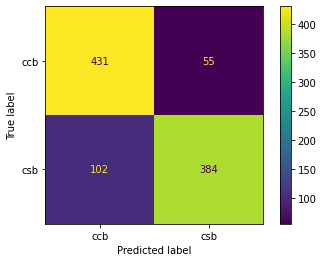

In [41]:
y_pred_train = clf.predict(X_train)
print('Resultados para conjunto de train \n')
print(classification_report(y_resampled_train, y_pred_train))
plot_confusion_matrix(clf, X_train, y_resampled_train, values_format = '')

ANALISIS DE LAS METRICAS 

Vemos los resultados para test. 

Resultados para conjunto de test 

              precision    recall  f1-score   support

         ccb       0.78      0.77      0.78       113
         csb       0.77      0.79      0.78       113

    accuracy                           0.78       226
   macro avg       0.78      0.78      0.78       226
weighted avg       0.78      0.78      0.78       226



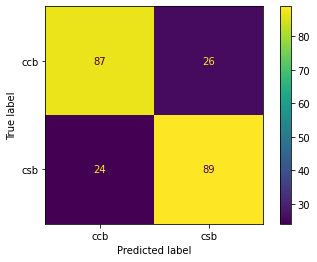

In [42]:
y_pred_train = clf.predict(X_test)
print('Resultados para conjunto de test \n')
print(classification_report(y_resampled_test, y_pred_train))
plot_confusion_matrix(clf, X_test, y_resampled_test, values_format = '')

Como podemos ver, el conjunto de test es mayor el error que en train, esto significa que el modelo está sobrejustando los datos. 

### Decision Boundary (límite de decisión)

In [43]:
X_resampled_train.head()

width  height  xmin  xmax  ...      2044      2045      2046      2047
0    400     224   351   386  ...  0.325722  0.256101  0.986947  0.195837
1    400     224   351   385  ...  0.318935  0.199575  0.770055  0.101509
2    640     360   203   252  ...  0.452438  0.005306  0.194883  0.323390
3    400     224   349   384  ...  0.158693  0.149666  0.528732  0.089840
4    400     224   349   380  ...  0.073962  0.182467  0.635909  0.054692

[5 rows x 2059 columns]

In [44]:
ch_R = X_resampled_train[['ch_R']]
ch_G = X_resampled_train[['ch_G']]
ch_R = ch_R.to_numpy()
ch_G = ch_G.to_numpy()

In [116]:
#plot_decision_boundary(clf, ch_R, ch_G)

In [46]:
y_resampled_train

clase
0     ccb
1     ccb
2     ccb
3     ccb
4     ccb
..    ...
967   csb
968   csb
969   csb
970   csb
971   csb

[972 rows x 1 columns]

#### Con tuneo de hiperparametros

En esta instancia se tunearon los hiperparamétros:

* loss: se varió entre 'hinge', 'loss', y 'perceptron'. 

* alpha: entre 0.001, 0.0001 y 0.00001 

* penalty: entre 'l1', 'l2' y 'elasticnet'. 

* l1_ratio: entre 0.2, 0.5 y 0.75



In [49]:
param_grid = {
    'loss': ['hinge', 'log', 'perceptron'],
    'alpha': [0.001, 0.0001, 0.00001],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.75]
}

cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=3)
cv.fit(X_train, y_resampled_train)

results = cv.cv_results_
df = pd.DataFrame(results)

df[['param_loss', 'param_alpha', 'param_penalty', 'param_l1_ratio', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

param_loss param_alpha  ... std_test_score rank_test_score
74       hinge       1e-05  ...       0.141153               1
20       hinge       0.001  ...       0.122847               2
46       hinge      0.0001  ...       0.139797               3
37       hinge      0.0001  ...       0.139797               3
28       hinge      0.0001  ...       0.139797               3
..         ...         ...  ...            ...             ...
70  perceptron       1e-05  ...       0.111368              76
79  perceptron       1e-05  ...       0.111368              76
17  perceptron       0.001  ...       0.076893              79
62  perceptron       1e-05  ...       0.096159              80
44  perceptron      0.0001  ...       0.149606              81

[81 rows x 7 columns]

Imprimimos los mejores hiperparámetros del modelo

In [50]:
cv.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.75, 'loss': 'hinge', 'penalty': 'elasticnet'}

Vemos el mejor modelo

In [51]:
cv.best_estimator_

SGDClassifier(alpha=1e-05, l1_ratio=0.75, penalty='elasticnet',
              random_state=100)

Con estos hiperparámetros vamos a entrenar el modelo y ver los resultados para los datos de TRAIN. 

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

         ccb       0.81      0.83      0.82       486
         csb       0.83      0.80      0.81       486

    accuracy                           0.82       972
   macro avg       0.82      0.82      0.82       972
weighted avg       0.82      0.82      0.82       972



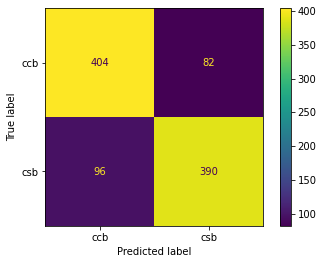

In [52]:
y_pred_train = cv.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
print(classification_report(y_resampled_train, y_pred_train))
plot_confusion_matrix(cv, X_train, y_resampled_train, values_format = '')

Vemos los resultados para los datos de TEST

Resultados para conjunto de test 

              precision    recall  f1-score   support

         ccb       0.79      0.74      0.76       113
         csb       0.76      0.80      0.78       113

    accuracy                           0.77       226
   macro avg       0.77      0.77      0.77       226
weighted avg       0.77      0.77      0.77       226



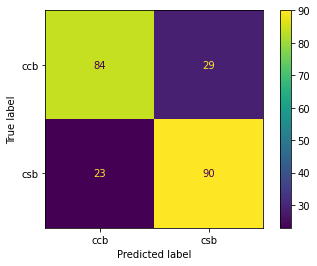

In [53]:
y_pred_test = cv.predict(X_test)
print('Resultados para conjunto de test \n')
print(classification_report(y_resampled_test, y_pred_test))
plot_confusion_matrix(cv, X_test, y_resampled_test, values_format = '')

#### Curvas ROC

La curva ROC (receiver operating characteristic) relaciona el recall con el ratio de falsos positivos. Es decir relaciona la sensibilidad de nuestro modelo con los fallos optimistas (clasificar los negativos como positivos). Tiene sentido ya que, generalmente, si aumentamos el recall, nuestro modelo tenderá a ser más optimista e introducirá mas falsos positivos en la clasificación.

En las curvas ROC, **nos interesa que la curva se acerque lo máximo posible a la esquina superior izquierda de la gráfica**, de manera que el hecho de aumentar la sensibilidad (el recall) no haga que nuestro modelo introduzca más falsos positivos.

Fuente: https://medium.com/bluekiri/curvas-pr-y-roc-1489fbd9a527

La curva ROC nos permite obtener el AUC o área bajo la curva. 
El AUC oscila en valor del 0 al 1. Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0.0; otro cuyas predicciones son un 100% correctas tiene un AUC de 1.0.

El AUC es conveniente por las dos razones siguientes:

* El AUC es invariable con respecto a la escala. Mide qué tan bien se clasifican las predicciones, en lugar de sus valores absolutos.
* El AUC es invariable con respecto al umbral de clasificación. Mide la calidad de las predicciones del modelo, sin tener en cuenta qué umbral de clasificación se elige.

Fuente: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es

Curva ROC para SGD Classifier 



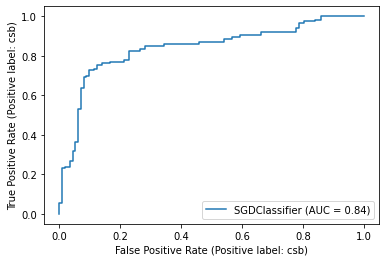

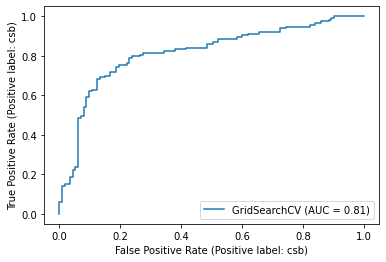

In [54]:
sgd_disp = plot_roc_curve(clf, X_test, y_resampled_test)
sgd_tuned = plot_roc_curve(cv, X_test, y_resampled_test)
print('Curva ROC para SGD Classifier \n')

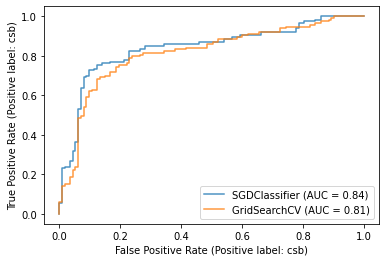

In [55]:
ax = plt.gca()
sgd_disp.plot(ax=ax, alpha=0.8)
sgd_tuned.plot(ax=ax, alpha=0.8)

#### Curvas Precision Recall

Las curvas PR (precision-recall) son herramientas utilizadas en la evaluación del rendimiento de clasificadores binarios. Estas curvas nos indican de manera visual la relación entre la precisión y la sensibilidad de nuestro modelo, a la vez que sirven para comparar el rendimiento de distintos modelos de clasificación.

Definamos primero los conceptos de Precision y de Recall:

**Precision:** la precisión es el ratio o porcentaje de clasificaciones correctas de nuestro clasificador. En otras palabras, de todo lo que nuestro clasificador clasifica como positivo, correcta o incorrectamente (TP + FP), cual es el ratio de clasificaciones correctas.

**Recall:** el recall o sensibilidad de nuestro modelo es el ratio de positivos detectado en el dataset por nuestro clasificador. En otras palabras, de todos los positivos reales de nuestro dataset, detectados o no (TP + FN), cual es el ratio de positivos detectados.


Fuente: https://medium.com/bluekiri/curvas-pr-y-roc-1489fbd9a527

Curva ROC para SGD Classifier 



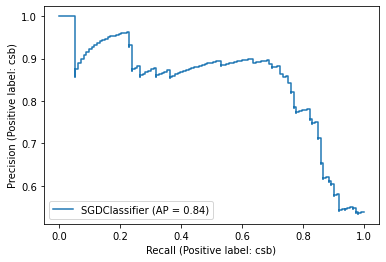

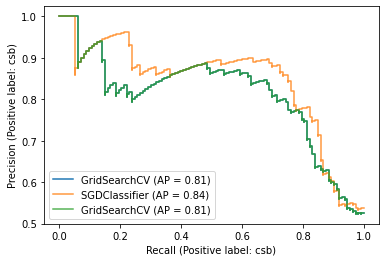

In [56]:
sgd_pr = plot_precision_recall_curve(clf, X_test, y_resampled_test)

sgd_prtuned = plot_precision_recall_curve(cv, X_test, y_resampled_test)

ax = plt.gca()
sgd_pr.plot(ax=ax, alpha=0.8)
sgd_prtuned.plot(ax=ax, alpha=0.8)
print('Curva ROC para SGD Classifier \n')

### Clasificador: DecisionTrees()

En esta etapa vamos a clasificar con otra familia de algoritmos, que son los árboles de decisión, que nos permiten limites de decisión que no son lineales, a diferencia del anterior clasificador. 

Mas información en: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**¿Qué son los árboles de decisión?**


* El enfoque classification and regression tree (CART) fue desarrollado por Breiman et al. (1984).
* Son un tipo de algoritmos de aprendizaje supervisado (i.e., existe una variable objetivo predefinida).
* Principalmente usados en problemas de clasificación.
* Las variables de entrada y salida pueden ser categóricas o continuas.
* Divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas.


**Ventajas de árboles de decisión**

* Fácil de entender
* Util en exploración de datos:identificar importancia de variables a partir de cientos de variables.
* Menos limpieza de datos: outliers y valores faltantes no influencian el modelo (A un cierto grado)
* El tipo de datos no es una restricción
* Es un método no paramétrico (i.e., no hay suposición acerca del espacio de distribución y la estructura del clasificador)

**Desventajas de árboles de decisión**

* Sobreajuste
* Pérdida de información al categorizar variables continuas
* Precisión: métodos como SVM y clasificadores tipo ensamblador a menudo tienen tasas de error 30% más bajas que CART (Classification and Regression Trees)
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.

Fuente: https://bookdown.org/content/2031/arboles-de-decision-parte-i.html#conceptos-introductorios

#### Sin tuneo de hiperparámetros

En esta primera instancia entrenamos y clasificamos con el modelo por defecto, es decir, sin optimización de hiperparámetros. Fijamos la semilla aleatoria en 101. 

In [57]:
clf_dt = DecisionTreeClassifier(random_state = 101)
clf_dt.fit(X_train, y_resampled_train)

DecisionTreeClassifier(random_state=101)

Vamos a predecir en el training set para comparar luego con el TEST set. También pedimos las demás metricas, como asi también, la matriz de confusión. 

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

         ccb       1.00      1.00      1.00       486
         csb       1.00      1.00      1.00       486

    accuracy                           1.00       972
   macro avg       1.00      1.00      1.00       972
weighted avg       1.00      1.00      1.00       972



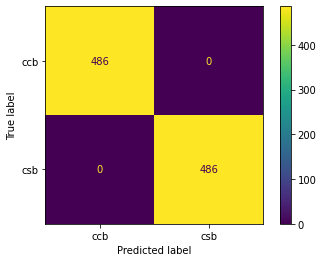

In [58]:
y_pred_train = clf_dt.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
print(classification_report(y_resampled_train, y_pred_train))
plot_confusion_matrix(clf_dt, X_train, y_resampled_train, values_format = '')

Se observa a simple vista que el modelo está haciendo overfitting. 

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

         ccb       0.89      0.89      0.89       113
         csb       0.89      0.89      0.89       113

    accuracy                           0.89       226
   macro avg       0.89      0.89      0.89       226
weighted avg       0.89      0.89      0.89       226



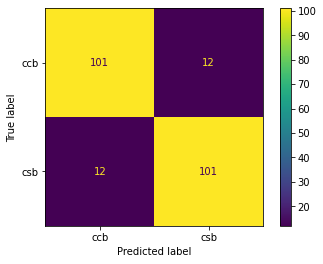

In [59]:
y_pred = clf_dt.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
print(classification_report(y_resampled_test, y_pred))
plot_confusion_matrix(clf_dt, X_test, y_resampled_test, values_format = '')

#### Con tuneo de hiperparámetros

En esta etapa vamos a entrenar y clasificar haciendo un barrido de hiperparámetros como los q se detallan a continuación:

* criterion: 'gini' y 'entropy'. 
* max_depth: entre 5, 10, 15, 20, 22
* min_samples_leaf: 1, 5, 10, 15. 

In [60]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,22],
    'min_samples_leaf': [1, 5, 10, 15],
    }

cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=101), param_grid, scoring='accuracy', cv=3)
cv_dt.fit(X_train, y_resampled_train)

results = cv_dt.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_criterion param_max_depth  ... std_test_score  rank_test_score
25         entropy              10  ...       0.100085                1
34         entropy              20  ...       0.084425                2
26         entropy              10  ...       0.084425                2
38         entropy              22  ...       0.084425                2
30         entropy              15  ...       0.084425                2
14            gini              20  ...       0.065924                6
6             gini              10  ...       0.065924                6
18            gini              22  ...       0.065924                6
10            gini              15  ...       0.065924                6
22         entropy               5  ...       0.078135               10
2             gini               5  ...       0.068104               11
37         entropy              22  ...       0.153399               12
29         entropy              15  ...       0.153399               12
33         entropy              20  ...       0.153399               12
21         entropy               5  ...       0.122242               15
32         entropy              20  ...       0.118093               16
28         entropy              15  ...       0.118093               16
36         entropy              22  ...       0.118093               16
1             gini               5  ...       0.101753               19
12            gini              20  ...       0.101001               20
16            gini              22  ...       0.101001               20
4             gini              10  ...       0.095972               20
8             gini              15  ...       0.101001               20
5             gini              10  ...       0.141931               24
17            gini              22  ...       0.141931               24
13            gini              20  ...       0.141931               24
9             gini              15  ...       0.141931               24
20         entropy               5  ...       0.102065               28
0             gini               5  ...       0.104787               29
24         entropy              10  ...       0.123259               30
35         entropy              20  ...       0.059261               31
39         entropy              22  ...       0.059261               31
27         entropy              10  ...       0.059261               31
31         entropy              15  ...       0.059261               31
15            gini              20  ...       0.080062               35
11            gini              15  ...       0.080062               35
7             gini              10  ...       0.080062               35
19            gini              22  ...       0.080062               35
3             gini               5  ...       0.045244               39
23         entropy               5  ...       0.059118               40

[40 rows x 6 columns]

En esta etapa vamos a predecir el conjunto de TRAIN para luego poder comparar con el test set y poder evaluar el modelo. 

              precision    recall  f1-score   support

         ccb       0.93      0.98      0.96       486
         csb       0.98      0.93      0.95       486

    accuracy                           0.95       972
   macro avg       0.96      0.95      0.95       972
weighted avg       0.96      0.95      0.95       972



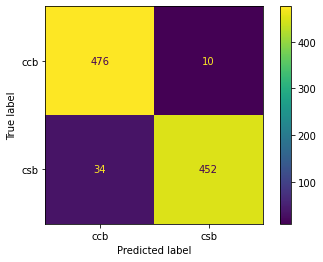

In [61]:
y_pred_train = cv_dt.predict(X_train)
print(classification_report(y_resampled_train, y_pred_train))
plot_confusion_matrix(cv_dt, X_train, y_resampled_train, values_format = '')

Para el conjunto de TEST

              precision    recall  f1-score   support

         ccb       0.86      0.89      0.87       113
         csb       0.89      0.85      0.87       113

    accuracy                           0.87       226
   macro avg       0.87      0.87      0.87       226
weighted avg       0.87      0.87      0.87       226



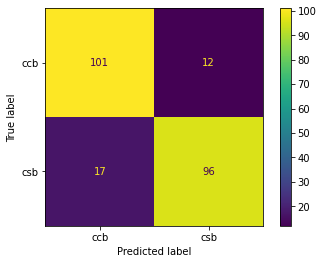

In [62]:
y_pred_train = cv_dt.predict(X_test)
print(classification_report(y_resampled_test, y_pred_train))
plot_confusion_matrix(cv_dt, X_test, y_resampled_test, values_format = '')

[Text(828.6299999999999, 770.1, 'X[17] <= 0.55\ngini = 0.5\nsamples = 972\nvalue = [486, 486]'),
 Text(318.05999999999995, 679.5, 'X[15] <= 0.454\ngini = 0.116\nsamples = 471\nvalue = [29, 442]'),
 Text(133.92, 588.9, 'X[10] <= 71.103\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(66.96, 498.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(200.88, 498.3, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(502.19999999999993, 588.9, 'X[19] <= 1.209\ngini = 0.035\nsamples = 446\nvalue = [8, 438]'),
 Text(334.79999999999995, 498.3, 'X[14] <= 0.724\ngini = 0.018\nsamples = 436\nvalue = [4, 432]'),
 Text(200.88, 407.7, 'X[17] <= 0.332\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(133.92, 317.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(267.84, 317.1, 'X[16] <= 0.222\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(200.88, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(334.79999999999995, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(468.71

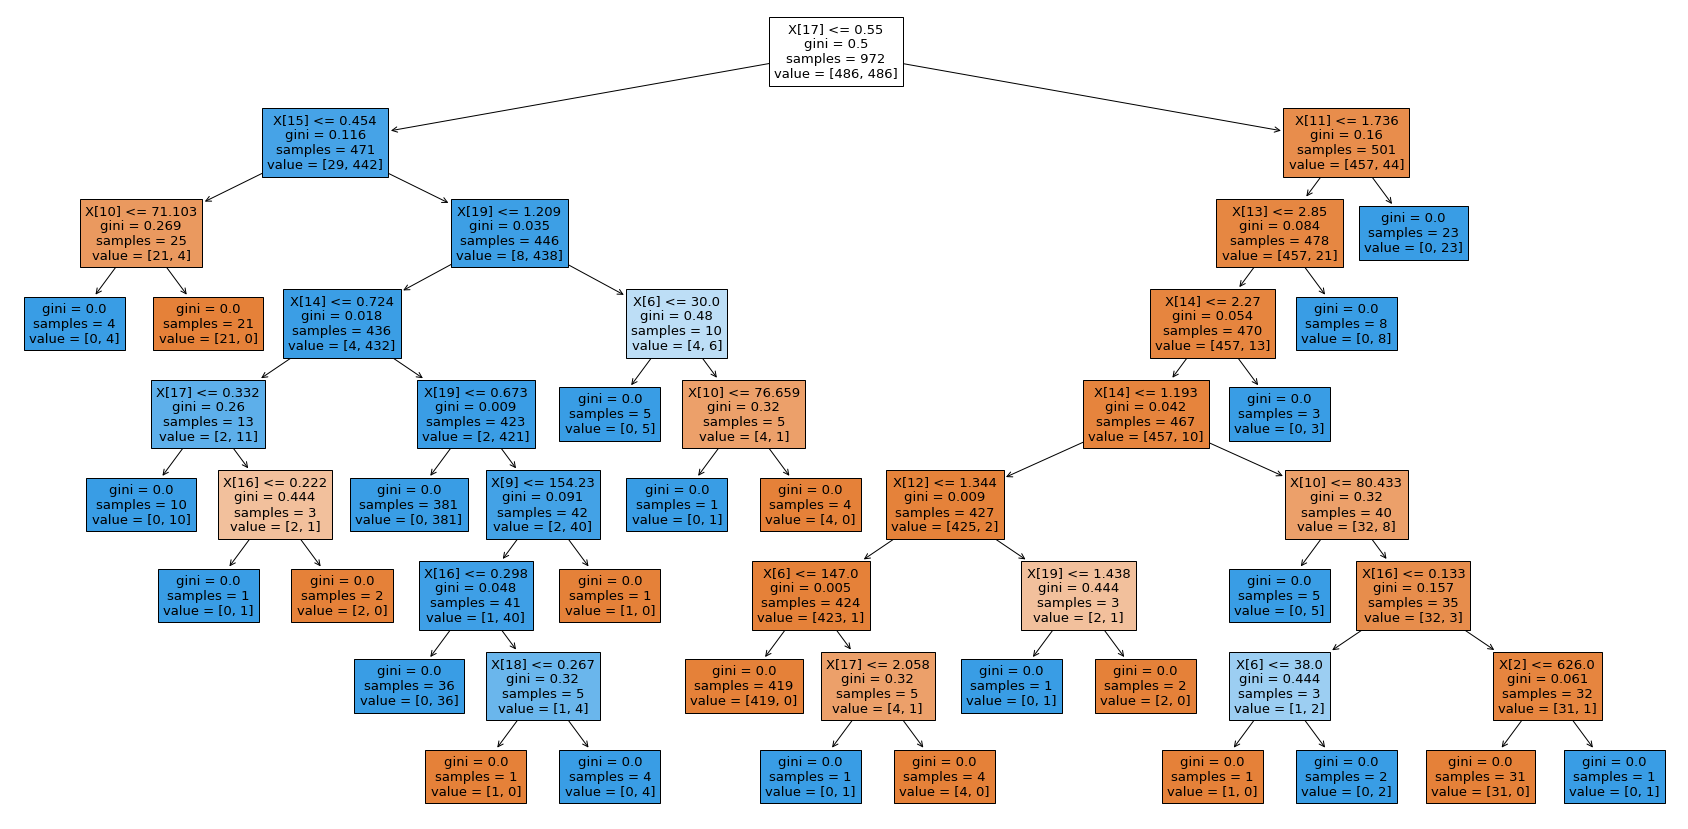

In [117]:
plt.figure(figsize=(30,15))
plot_tree(clf_dt, 
          filled=True)

### Curvas ROC

Curva ROC para DecisionTree Classifier 



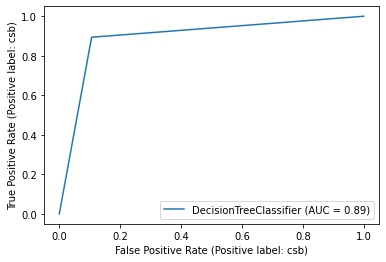

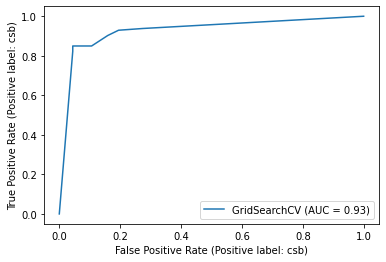

In [64]:
dt = plot_roc_curve(clf_dt, X_test, y_resampled_test)
dt_tuned = plot_roc_curve(cv_dt, X_test, y_resampled_test)
print('Curva ROC para DecisionTree Classifier \n')

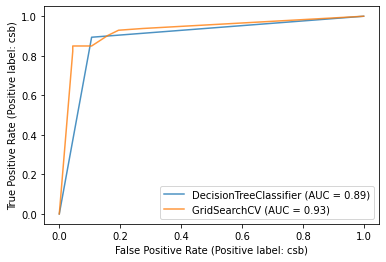

In [65]:
ax = plt.gca()
dt.plot(ax=ax, alpha=0.8)
dt_tuned.plot(ax=ax, alpha=0.8)

#### Curvas Precision Recall

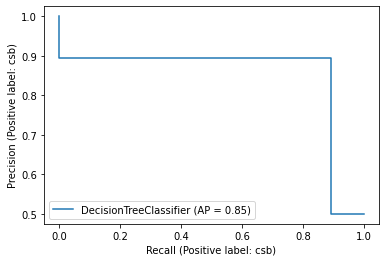

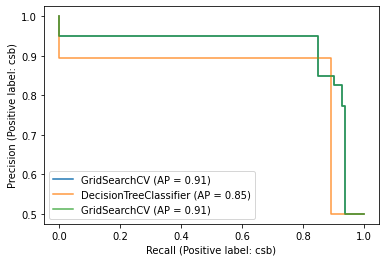

In [66]:
dt_pr = plot_precision_recall_curve(clf_dt, X_test, y_resampled_test)

dt_prtuned = plot_precision_recall_curve(cv_dt, X_test, y_resampled_test)

ax = plt.gca()
dt_pr.plot(ax=ax, alpha=0.8)
dt_prtuned.plot(ax=ax, alpha=0.8)

## 2da instancia: Con las variables originales mas las 10 mejores de la ResNet10




In [67]:
resnet10var = X_resampled_train.iloc[:,11:]
resnet10var.head()

0         1         2  ...      2045      2046      2047
0  0.466196  0.054288  0.213965  ...  0.256101  0.986947  0.195837
1  0.620449  0.086603  0.405032  ...  0.199575  0.770055  0.101509
2  0.000225  0.060191  0.147709  ...  0.005306  0.194883  0.323390
3  0.623596  0.125645  0.322140  ...  0.149666  0.528732  0.089840
4  0.637640  0.092548  0.184564  ...  0.182467  0.635909  0.054692

[5 rows x 2048 columns]

In [68]:
#Repetimos el calculo del notebook 2 solo para recordar
f_selector = SelectKBest(f_classif, k=10) 

X_kbest = f_selector.fit_transform(resnet10var, y_resampled_train)

fit = f_selector.fit(resnet10var, y_resampled_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(resnet10var.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 50 best features
# Show results
print('Original number of features:', resnet10var.shape[1])
#print('Reduced number of features:', X_kbest.shape[1])

     features        Score
398       398  1924.850463
698       698  1769.730899
816       816  1365.091597
1132     1132  1357.724697
1049     1049  1294.751301
1490     1490  1285.429823
1088     1088  1269.842294
844       844  1167.423235
1069     1069  1147.603731
2013     2013  1089.400523
Original number of features: 2048


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Elegimos las variables para el dataset

In [69]:
resnet10_train = X_resampled_train[['width','height','xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B','398', '698', '816', '1132', '1049', '1490', '1088', '844', '1069', '2013']]
resnet10_train.shape

(972, 21)

Vemos el encabezado para cerciorarnos de que fue correcta la selección

In [70]:
resnet10_train.head()

width  height  xmin  xmax  ...      1088       844      1069      2013
0    400     224   351   386  ...  1.514659  0.980718  1.419591  1.096745
1    400     224   351   385  ...  1.290469  1.090407  1.340493  1.415161
2    640     360   203   252  ...  1.848261  0.257094  1.016235  1.158903
3    400     224   349   384  ...  2.413186  0.750662  1.781969  0.737363
4    400     224   349   380  ...  2.037670  1.098811  1.095638  1.086237

[5 rows x 21 columns]

In [71]:
resnet10_test = X_resampled_test[['width','height','xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B','398', '698', '816', '1132', '1049', '1490', '1088', '844', '1069', '2013']]
resnet10_test.shape

(226, 21)

In [72]:
resnet10_test.head()

width  height  xmin  xmax  ...      1088       844      1069      2013
0    400     224   189   266  ...  2.897867  1.238793  2.003539  1.033272
1    400     224   190   267  ...  2.718337  1.474236  1.949130  0.983447
2    400     224   189   268  ...  2.642564  1.633001  2.162978  0.907901
3    400     224   198   273  ...  2.792874  1.398778  1.933139  0.707206
4    400     224   177   259  ...  2.766188  0.936570  2.043453  0.752312

[5 rows x 21 columns]

### SGD Classifier

### Sin tuneo de hiperparámetros

In [73]:
clf = SGDClassifier(random_state= 100) #solo se dejo la semilla aleatoria para asegurarnos reproducibilidad
scaler = StandardScaler()
X_train = scaler.fit_transform(resnet10_train)
X_test = scaler.transform(resnet10_test)
clf.fit(resnet10_train, y_resampled_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(random_state=100)

Resultados para conjunto de train 

              precision    recall  f1-score   support

         ccb       0.93      0.47      0.62       486
         csb       0.64      0.97      0.77       486

    accuracy                           0.72       972
   macro avg       0.79      0.72      0.70       972
weighted avg       0.79      0.72      0.70       972



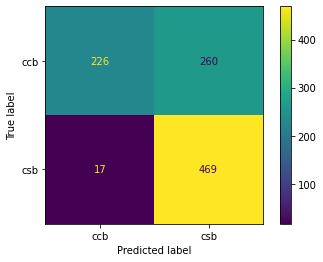

In [74]:
y_pred_train = clf.predict(resnet10_train)
print('Resultados para conjunto de train \n')
print(classification_report(y_resampled_train, y_pred_train))
plot_confusion_matrix(clf, resnet10_train, y_resampled_train, values_format = '')

Resultados para conjunto de test 

              precision    recall  f1-score   support

         ccb       0.88      0.44      0.59       113
         csb       0.63      0.94      0.75       113

    accuracy                           0.69       226
   macro avg       0.75      0.69      0.67       226
weighted avg       0.75      0.69      0.67       226



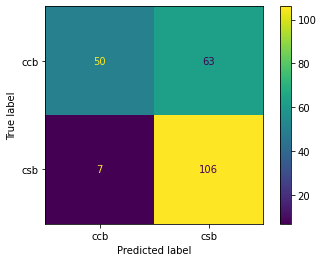

In [75]:
y_pred_train = clf.predict(resnet10_test)
print('Resultados para conjunto de test \n')
print(classification_report(y_resampled_test, y_pred_train))
plot_confusion_matrix(clf, resnet10_test, y_resampled_test, values_format = '')


### Con tuneo de hiperparametros

In [76]:
param_grid = {
    'loss': ['hinge', 'log', 'perceptron'],
    'alpha': [0.001, 0.0001, 0.00001],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.75]
}

cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=3)
cv.fit(resnet10_train, y_resampled_train)

results = cv.cv_results_
df = pd.DataFrame(results)

df[['param_loss', 'param_alpha', 'param_penalty', 'param_l1_ratio', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

param_loss param_alpha  ... std_test_score rank_test_score
52  perceptron      0.0001  ...       0.143363               1
43  perceptron      0.0001  ...       0.143363               1
34  perceptron      0.0001  ...       0.143363               1
56       hinge       1e-05  ...       0.137898               4
62  perceptron       1e-05  ...       0.137898               4
..         ...         ...  ...            ...             ...
2        hinge       0.001  ...       0.115931              77
77         log       1e-05  ...       0.039068              78
8   perceptron       0.001  ...       0.093966              79
68         log       1e-05  ...       0.083972              80
5          log       0.001  ...       0.086908              81

[81 rows x 7 columns]

In [77]:
cv.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.2, 'loss': 'perceptron', 'penalty': 'l2'}

In [78]:
cv.best_estimator_

SGDClassifier(l1_ratio=0.2, loss='perceptron', random_state=100)

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

         ccb       0.93      0.47      0.62       486
         csb       0.64      0.97      0.77       486

    accuracy                           0.72       972
   macro avg       0.79      0.72      0.70       972
weighted avg       0.79      0.72      0.70       972



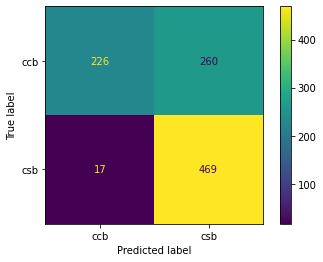

In [79]:
y_pred_train = cv.predict(resnet10_train)
print('Resultados para el mejor modelo conjunto train \n')
print(classification_report(y_resampled_train, y_pred_train))
plot_confusion_matrix(cv, resnet10_train, y_resampled_train, values_format = '')

Resultados para conjunto de test 

              precision    recall  f1-score   support

         ccb       0.88      0.44      0.59       113
         csb       0.63      0.94      0.75       113

    accuracy                           0.69       226
   macro avg       0.75      0.69      0.67       226
weighted avg       0.75      0.69      0.67       226



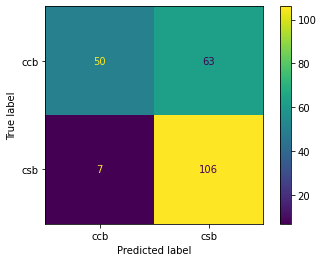

In [80]:
y_pred_test = cv.predict(resnet10_test)
print('Resultados para conjunto de test \n')
print(classification_report(y_resampled_test, y_pred_test))
plot_confusion_matrix(cv, resnet10_test, y_resampled_test, values_format = '')

#### Curvas ROC (todas)

Curva ROC para SGD Classifier 



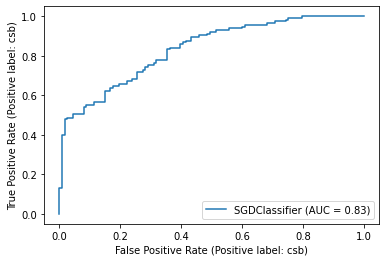

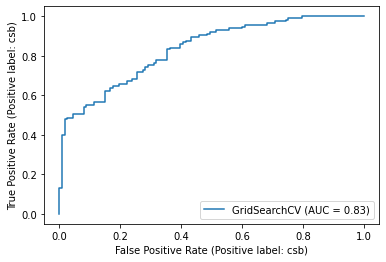

In [81]:
sgd_disp = plot_roc_curve(clf, resnet10_test, y_resampled_test)
sgd_tuned = plot_roc_curve(cv, resnet10_test, y_resampled_test)
print('Curva ROC para SGD Classifier \n')

Aparentemente las dos curvas son iguales, comparemoslas en un mismo gráfico. 

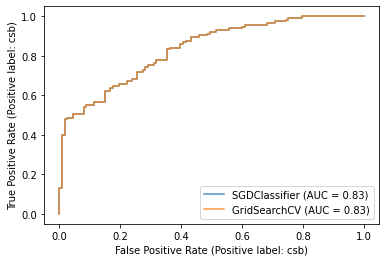

In [82]:
ax = plt.gca()
sgd_disp.plot(ax=ax, alpha=0.8)
sgd_tuned.plot(ax=ax, alpha=0.8)

#### Curva Precision Recall 



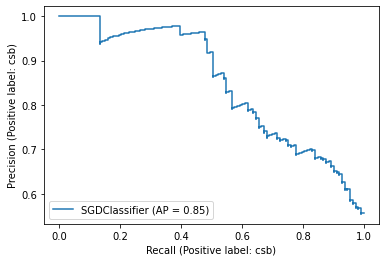

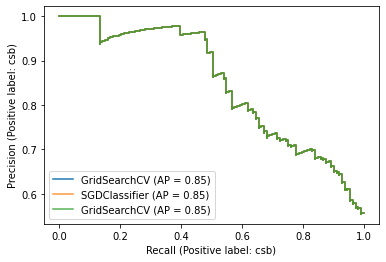

In [83]:
sgd_pr = plot_precision_recall_curve(clf, resnet10_test, y_resampled_test)

sgd_prtuned = plot_precision_recall_curve(cv, resnet10_test, y_resampled_test)

ax = plt.gca()
sgd_pr.plot(ax=ax, alpha=0.8)
sgd_prtuned.plot(ax=ax, alpha=0.8)


### Decision Trees

### Sin tuneo de hiperparámetros

En esta primera etapa se realizó la clasificacion con los hiperparámetros por defecto que ofrece el programa scikit-learn. Se seteo la semilla en 101 para hacer reproducible la clasificación. 

In [84]:
clf_dt = DecisionTreeClassifier(random_state = 101)
clf_dt.fit(resnet10_train, y_resampled_train)

DecisionTreeClassifier(random_state=101)

Primero vemos los resultados para el training. 

              precision    recall  f1-score   support

         ccb       1.00      1.00      1.00       486
         csb       1.00      1.00      1.00       486

    accuracy                           1.00       972
   macro avg       1.00      1.00      1.00       972
weighted avg       1.00      1.00      1.00       972



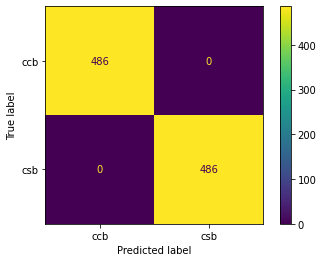

In [85]:
y_pred_train = clf_dt.predict(resnet10_train)
print(classification_report(y_resampled_train, y_pred_train))
plot_confusion_matrix(clf_dt, resnet10_train, y_resampled_train, values_format = '')

              precision    recall  f1-score   support

         ccb       0.97      1.00      0.99       113
         csb       1.00      0.97      0.99       113

    accuracy                           0.99       226
   macro avg       0.99      0.99      0.99       226
weighted avg       0.99      0.99      0.99       226



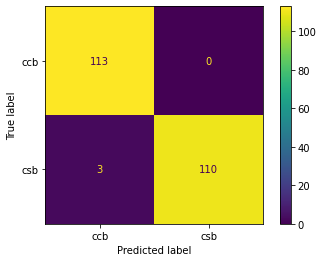

In [86]:
y_pred = clf_dt.predict(resnet10_test)
print(classification_report(y_resampled_test, y_pred))
plot_confusion_matrix(clf_dt, resnet10_test, y_resampled_test, values_format = '')

### Con tuneo de hiperparámetros

En esta oportunidad vamos a tunear los hiperparámetros que se detallan en el param_grid. 

In [87]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,22],
    'min_samples_leaf': [1, 5, 10, 15],
    }

cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=101), param_grid, scoring='accuracy', cv=3)
cv_dt.fit(resnet10_train, y_resampled_train)

results = cv_dt.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_criterion param_max_depth  ... std_test_score  rank_test_score
17            gini              22  ...       0.005820                1
1             gini               5  ...       0.005820                1
13            gini              20  ...       0.005820                1
9             gini              15  ...       0.005820                1
5             gini              10  ...       0.005820                1
10            gini              15  ...       0.013879                6
18            gini              22  ...       0.013879                6
14            gini              20  ...       0.013879                6
6             gini              10  ...       0.013879                6
2             gini               5  ...       0.013879                6
36         entropy              22  ...       0.018172               11
32         entropy              20  ...       0.018172               11
28         entropy              15  ...       0.018172               11
24         entropy              10  ...       0.018172               11
21         entropy               5  ...       0.032890               15
25         entropy              10  ...       0.029532               16
20         entropy               5  ...       0.016396               16
29         entropy              15  ...       0.029532               16
33         entropy              20  ...       0.029532               16
37         entropy              22  ...       0.029532               16
31         entropy              15  ...       0.022399               21
23         entropy               5  ...       0.022399               21
35         entropy              20  ...       0.022399               21
27         entropy              10  ...       0.022399               21
39         entropy              22  ...       0.022399               21
38         entropy              22  ...       0.024215               26
34         entropy              20  ...       0.024215               26
22         entropy               5  ...       0.024215               26
26         entropy              10  ...       0.024215               26
30         entropy              15  ...       0.024215               26
19            gini              22  ...       0.024476               31
15            gini              20  ...       0.024476               31
11            gini              15  ...       0.024476               31
7             gini              10  ...       0.024476               31
3             gini               5  ...       0.024476               31
0             gini               5  ...       0.023279               36
12            gini              20  ...       0.034919               37
8             gini              15  ...       0.034919               37
4             gini              10  ...       0.034919               37
16            gini              22  ...       0.034919               37

[40 rows x 6 columns]

              precision    recall  f1-score   support

         ccb       0.99      0.99      0.99       486
         csb       0.99      0.99      0.99       486

    accuracy                           0.99       972
   macro avg       0.99      0.99      0.99       972
weighted avg       0.99      0.99      0.99       972



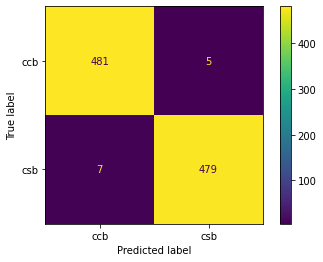

In [88]:
y_pred_train = cv_dt.predict(resnet10_train)
print(classification_report(y_resampled_train, y_pred_train))
plot_confusion_matrix(cv_dt, resnet10_train, y_resampled_train, values_format = '')

              precision    recall  f1-score   support

         ccb       0.95      0.98      0.97       113
         csb       0.98      0.95      0.96       113

    accuracy                           0.96       226
   macro avg       0.97      0.96      0.96       226
weighted avg       0.97      0.96      0.96       226



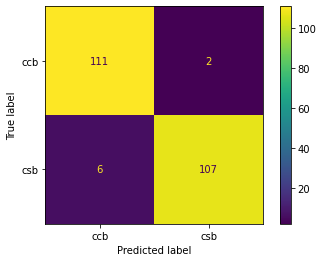

In [89]:
y_pred_train = cv_dt.predict(resnet10_test)
print(classification_report(y_resampled_test, y_pred_train))
plot_confusion_matrix(cv_dt, resnet10_test, y_resampled_test, values_format = '')

#### Curvas ROC

Curva ROC para DecisionTree Classifier 



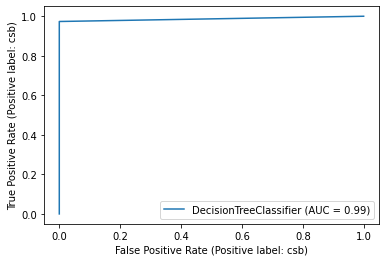

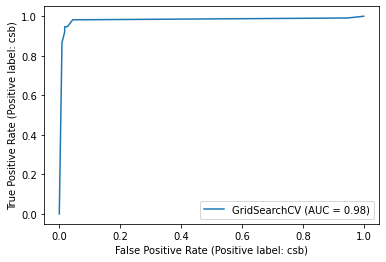

In [90]:
dt = plot_roc_curve(clf_dt, resnet10_test, y_resampled_test)
dt_tuned = plot_roc_curve(cv_dt, resnet10_test, y_resampled_test)
print('Curva ROC para DecisionTree Classifier \n')

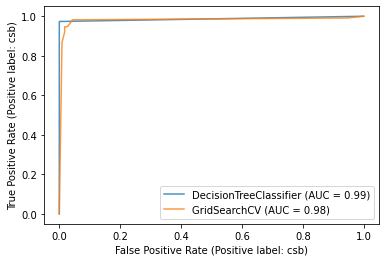

In [91]:
ax = plt.gca()
dt.plot(ax=ax, alpha=0.8)
dt_tuned.plot(ax=ax, alpha=0.8)

#### Curvas Precision Recall

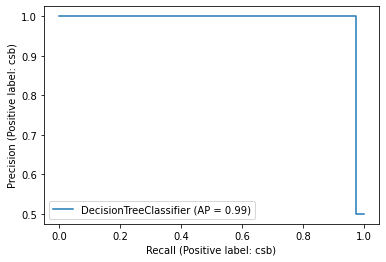

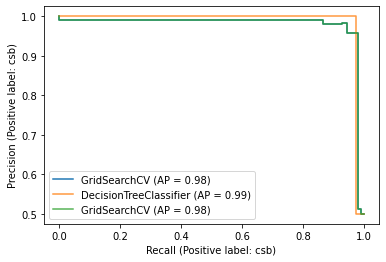

In [92]:
dt_pr = plot_precision_recall_curve(clf_dt, resnet10_test, y_resampled_test)

dt_prtuned = plot_precision_recall_curve(cv_dt, resnet10_test, y_resampled_test)

ax = plt.gca()
dt_pr.plot(ax=ax, alpha=0.8)
dt_prtuned.plot(ax=ax, alpha=0.8)


## Clasificación segun VIDEO - CLASIFICACIÓN MULTICLASE

In [93]:
test.head()

filename  width  ...      2046      2047
0  Video1-frame-000004_single_box_0.jpg    640  ...  0.499648  0.015035
1  Video1-frame-000021_single_box_0.jpg    640  ...  0.372580  0.057565
2  Video1-frame-000039_single_box_0.jpg    640  ...  0.631417  0.047634
3  Video1-frame-000040_single_box_0.jpg    640  ...  0.583134  0.020465
4  Video1-frame-000049_single_box_0.jpg    640  ...  0.616542  0.032798

[5 rows x 2063 columns]

In [94]:
train.head()

filename  width  ...      2046      2047
0  Video1-frame-000001_single_box_0.jpg    640  ...  0.574400  0.002943
1  Video1-frame-000002_single_box_0.jpg    640  ...  0.584723  0.016324
2  Video1-frame-000003_single_box_0.jpg    640  ...  0.363607  0.022648
3  Video1-frame-000005_single_box_0.jpg    640  ...  0.441648  0.007727
4  Video1-frame-000006_single_box_0.jpg    640  ...  0.450313  0.105094

[5 rows x 2063 columns]

In [95]:
X_train = train[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]
X_train.head()

width  height  xmin  xmax  ...  bb_height        ch_R        ch_G        ch_B
0    640     360   304   359  ...         78  191.840561  153.567825  132.866669
1    640     360   300   363  ...         75  183.752380  146.789627  126.877037
2    640     360   301   368  ...         81  175.958160  141.141510  121.987831
3    640     360   304   364  ...         84  187.911713  150.097229  129.374207
4    640     360   300   366  ...         87  173.947571  139.453323  120.885750

[5 rows x 11 columns]

In [96]:
X_test = test[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]
X_test.head()

width  height  xmin  xmax  ...  bb_height        ch_R        ch_G        ch_B
0    640     360   301   364  ...         75  186.534821  149.401276  128.560852
1    640     360   302   372  ...         92  167.621277  133.989441  115.107605
2    640     360   302   370  ...         78  173.094269  136.082397  116.621796
3    640     360   304   366  ...         86  169.174225  133.446930  115.077080
4    640     360   301   370  ...         71  178.161057  141.876297  121.297821

[5 rows x 11 columns]

In [97]:
y_train = train[['videoname']]
y_train.head()

videoname
0    Video1
1    Video1
2    Video1
3    Video1
4    Video1

In [98]:
y_test = test[['videoname']]
y_test.head()

videoname
0    Video1
1    Video1
2    Video1
3    Video1
4    Video1

In [99]:
#veamos cuantas muestras tenemos por clase
y_train.value_counts() 

videoname
Video3       323
Video8       302
Video1       286
Video2       195
Video11      178
video4       139
video5       132
video9       117
Video10      115
video7       102
video6        24
dtype: int64

In [100]:
y_test.value_counts()

videoname
Video1       78
Video8       72
Video3       72
video5       48
video4       46
Video2       46
Video11      45
video9       32
Video10      27
video7       24
video6        5
dtype: int64

#### Tecnica de oversampling SMOTE

Una mejora en la duplicación de ejemplos de la clase minoritaria es sintetizar nuevos ejemplos de la clase minoritaria. Esta es una forma de aumentar los datos tabulares. 

El enfoque más utilizado para sintetizar nuevos ejemplos se denomina Técnica de sobremuestreo de minorías sintéticas, o **SMOTE** para abreviar. Esta técnica fue descrita por Nitesh Chawla, et al. en el paper de 2002: “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE funciona seleccionando ejemplos cercanos en el espacio de características, dibujando una línea entre los ejemplos en el espacio de características y dibujando una nueva muestra en un punto a lo largo de esa línea.

Específicamente, primero se elige un ejemplo aleatorio de la clase minoritaria. Entonces se encuentran k de los vecinos más cercanos para ese ejemplo (típicamente k = 5). Se elige un vecino seleccionado al azar y se crea un ejemplo sintético en un punto seleccionado al azar entre los dos ejemplos en el espacio de características.

<img src='https://machinelearningmastery.com/wp-content/uploads/2019/10/Scatter-Plot-of-Imbalanced-Binary-Classification-Problem-Transformed-by-SMOTE.png' width="500" height="350">


Fuente: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 

In [101]:
#en este caso vamos a hacer oversampling para todas las categorias
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=4,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X_train, y_train)


In [102]:
X_train.shape, y_train.shape

((1913, 11), (1913, 1))

In [103]:
X_res.shape, y_res.shape

((3553, 11), (3553, 1))

Vemos cuando tenemos de cada video:

In [104]:
y_res.value_counts()

videoname
video9       323
video7       323
video6       323
video5       323
video4       323
Video8       323
Video3       323
Video2       323
Video11      323
Video10      323
Video1       323
dtype: int64

In [105]:
X_res = pd.DataFrame(X_res, columns=X_train.columns)
y_res = pd.DataFrame(y_res, columns=['videoname'])

In [106]:
#resampling para el test set 
X_res_test, y_res_test = sm.fit_resample(X_test, y_test)


In [107]:
X_res_test = pd.DataFrame(X_res_test, columns= X_test.columns)
y_res_test = pd.DataFrame(y_res_test, columns=['videoname'])

## Clasificador: DecisionTreeClassifier para clasificar video de procedencia. 


Basandonos en resultados previos (TP 2) en la cual observamos que luego de reducir dimensiones era dificil encontrar agrupaciones claras con respecto a los videos, decidimos aplicar de entrada un clasificador NO LINEAL, como son los árboles de decisión.


In [108]:
clf_vid = DecisionTreeClassifier(random_state = 101)
clf_vid.fit(X_res, y_res)

DecisionTreeClassifier(random_state=101)

              precision    recall  f1-score   support

      Video1       1.00      1.00      1.00       323
     Video10       1.00      1.00      1.00       323
     Video11       1.00      1.00      1.00       323
      Video2       1.00      1.00      1.00       323
      Video3       1.00      1.00      1.00       323
      Video8       1.00      1.00      1.00       323
      video4       1.00      1.00      1.00       323
      video5       1.00      1.00      1.00       323
      video6       1.00      1.00      1.00       323
      video7       1.00      1.00      1.00       323
      video9       1.00      1.00      1.00       323

    accuracy                           1.00      3553
   macro avg       1.00      1.00      1.00      3553
weighted avg       1.00      1.00      1.00      3553



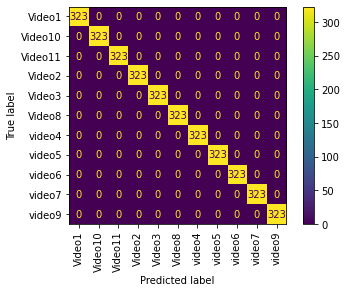

In [109]:
y_pred_train = clf_vid.predict(X_res)
print(classification_report(y_res, y_pred_train))
plot_confusion_matrix(clf_vid, X_res, y_res, values_format = '', xticks_rotation='vertical')

              precision    recall  f1-score   support

      Video1       0.83      0.94      0.88        78
     Video10       0.89      0.94      0.91        78
     Video11       0.95      0.96      0.96        78
      Video2       0.93      0.64      0.76        78
      Video3       0.72      0.85      0.78        78
      Video8       1.00      1.00      1.00        78
      video4       0.91      0.68      0.78        78
      video5       1.00      1.00      1.00        78
      video6       0.83      1.00      0.91        78
      video7       1.00      1.00      1.00        78
      video9       0.96      0.95      0.95        78

    accuracy                           0.90       858
   macro avg       0.91      0.90      0.90       858
weighted avg       0.91      0.90      0.90       858



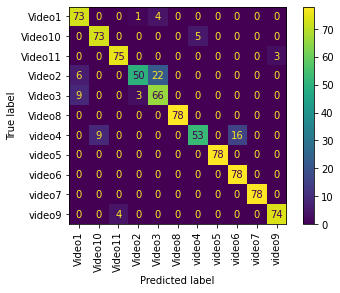

In [110]:
y_pred = clf_vid.predict(X_res_test)
print(classification_report(y_res_test, y_pred))
plot_confusion_matrix(clf_vid, X_res_test, y_res_test, values_format = '', xticks_rotation='vertical')

In [111]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,22],
    'min_samples_leaf': [1, 5, 10, 15],
    }

cv_ = GridSearchCV(DecisionTreeClassifier(random_state=101), param_grid, scoring='accuracy', cv=3)
cv_.fit(X_res, y_res)

results = cv_.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_criterion param_max_depth  ... std_test_score  rank_test_score
8             gini              15  ...       0.011979                1
12            gini              20  ...       0.012925                2
16            gini              22  ...       0.012925                2
24         entropy              10  ...       0.021509                4
32         entropy              20  ...       0.021489                5
36         entropy              22  ...       0.021489                5
28         entropy              15  ...       0.021489                5
17            gini              22  ...       0.020708                8
9             gini              15  ...       0.020708                8
13            gini              20  ...       0.020708                8
25         entropy              10  ...       0.021245               11
33         entropy              20  ...       0.021114               12
29         entropy              15  ...       0.021114               12
37         entropy              22  ...       0.021114               12
4             gini              10  ...       0.038398               15
26         entropy              10  ...       0.004403               16
18            gini              22  ...       0.016538               17
14            gini              20  ...       0.016538               17
10            gini              15  ...       0.016538               17
27         entropy              10  ...       0.024114               20
5             gini              10  ...       0.035120               21
38         entropy              22  ...       0.006281               22
30         entropy              15  ...       0.006281               22
34         entropy              20  ...       0.006281               22
11            gini              15  ...       0.021023               25
15            gini              20  ...       0.021023               25
19            gini              22  ...       0.021023               25
31         entropy              15  ...       0.027872               28
35         entropy              20  ...       0.027872               28
39         entropy              22  ...       0.027872               28
6             gini              10  ...       0.034101               31
7             gini              10  ...       0.040633               32
20         entropy               5  ...       0.042293               33
21         entropy               5  ...       0.042035               34
23         entropy               5  ...       0.048213               35
22         entropy               5  ...       0.046147               36
0             gini               5  ...       0.027687               37
1             gini               5  ...       0.027798               38
3             gini               5  ...       0.025058               39
2             gini               5  ...       0.023556               40

[40 rows x 6 columns]

              precision    recall  f1-score   support

      Video1       1.00      0.98      0.99       323
     Video10       1.00      1.00      1.00       323
     Video11       1.00      1.00      1.00       323
      Video2       0.97      0.99      0.98       323
      Video3       0.98      0.98      0.98       323
      Video8       1.00      1.00      1.00       323
      video4       1.00      1.00      1.00       323
      video5       1.00      1.00      1.00       323
      video6       1.00      1.00      1.00       323
      video7       1.00      1.00      1.00       323
      video9       1.00      1.00      1.00       323

    accuracy                           1.00      3553
   macro avg       1.00      1.00      1.00      3553
weighted avg       1.00      1.00      1.00      3553



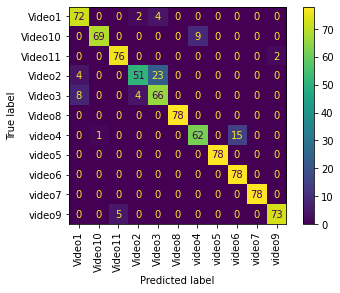

In [112]:
y_pred_train = cv_.predict(X_res)
print(classification_report(y_res, y_pred_train))
plot_confusion_matrix(cv_, X_res_test, y_res_test, values_format = '', xticks_rotation='vertical')

              precision    recall  f1-score   support

      Video1       0.86      0.92      0.89        78
     Video10       0.99      0.88      0.93        78
     Video11       0.94      0.97      0.96        78
      Video2       0.89      0.65      0.76        78
      Video3       0.71      0.85      0.77        78
      Video8       1.00      1.00      1.00        78
      video4       0.87      0.79      0.83        78
      video5       1.00      1.00      1.00        78
      video6       0.84      1.00      0.91        78
      video7       1.00      1.00      1.00        78
      video9       0.97      0.94      0.95        78

    accuracy                           0.91       858
   macro avg       0.92      0.91      0.91       858
weighted avg       0.92      0.91      0.91       858



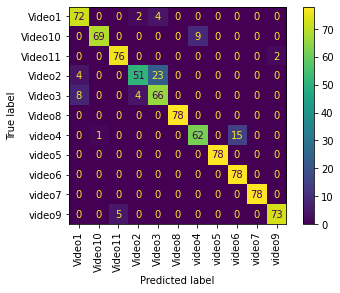

In [113]:
y_pred_train = cv_.predict(X_res_test)
print(classification_report(y_res_test, y_pred_train))
plot_confusion_matrix(cv_, X_res_test, y_res_test, values_format = '', xticks_rotation='vertical')

Después del tuneo de hiperparámetros, el error de test disminuyó de 10% a 9%. 

**IMPORTANTE: Para ver detalladamente los errores de train y test para todos los modelos optimizados, consultar la tabla adjunta en el repositorio.**

## Conclusión de los modelos de clasificación 

En sección del trabajo se realizaron varios modelos de clasificación y según diferentes criterios.

**Clasificación según label = con/sin barbijo**

En este caso teniamos una clasificación binaria, pero el dataset se encontraba desbalanceado. Para balancear las clases y tener la misma cantidad en ambas clases, se utilizo una técnica de undersampling llamada NearMiss en su versión 1, que permite eliminar muestras de la clase mayoritaria. 

*Instancia 1: con las variables originales*

*1. Modelo SGD*

En esta etapa se optimizo un modelo lineal mediante el algoritmo SGD disponible en scikit-learn. Mediante SGD se engloba a varias familias de diferentes algoritmos de ML, que podemos vaariar según la loss function que utilicemos. En este trabajo se trabajaron con varias loss. 

En una segunda etapa se optimizaron los siguientes hiperparámetros, mediante el algoritmo GridSearchCV de scikit-learn. 

*2. Modelo Decision Trees*

Con este segundo modelo se procedio de igual manera, en una primera parte con los hiperparámetros por defecto, y luego en una segunda parte optimizando los hiperparámetros mediante GridSearchCV. 

En primer lugar obtenemos de train un valor de accuracy de 100%, pero como los árboles de decisión siempre overfittean el train set, lo que debemos observar es la diferencia entre train y test. 

*Instancia 2: con las variables originales junto a las 10 mejores de la ResNet10*

*1. Modelo SGD*

Se procedió de manera análoga a la anterior sección (Modelo SGD)

*2. Modelo Decision Trees*

Se procedió de manera análoga a la anterior sección (Modelo Decision Trees)

Importante destacar que mediante el agregado de estas variables no se mejoró en la Accuracy del modelo, pero se logró una menor diferencia entre los errores de train y test, con lo que podemos decir que el balance entre sesgo y varianza es mejor incluyendo estas variables que no incluyéndolas.  


**Clasificación multiclase según video**

En esta etapa nuevamente se hallaban las clases desbalanceadas según el video del cual procedían las imágenes. 
En esta oportunidad lo que se hizo fue en vez de hacer undersampling de la clase mayoritaria, se realizó un oversampling con una técnica llamada SMOTE.

*Modelo Decision Trees*

Se realizó una clasificación mediante Árboles de Decisión sin tunning de hiperparámetros y con tunning de hiperparámetros. 
Luego de la optimización de hiperparámetros se logró solamente disminuir en 1% la diferencia entre train-test. 




 ### <font color='red'> Correcciones:.</font>
 * Muy Buen trabajo y analasis realizado! 